<a href="https://colab.research.google.com/github/MuellTech/Git-tips/blob/main/Breast_Cancer_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# load the data set from a csv file into a pandas dataframe
df = pd.read_csv("/cancer.csv")

In [ ]:
# inspect first few rows of the data
df.head()

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis(1=m, 0=b)      569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# from the above it shows clearly that there are no missing values in our data

In [ ]:
# check for categorical variables
object_cols = df.select_dtypes(include = 'object').columns.tolist()
print('Columns with categorical Variables')
i = 1
if object_cols:
    for col in object_cols:
        print(i+ '. ' + col)
else:
    print('None')

Columns with categorical Variables
None


In [ ]:
# No categorical variables

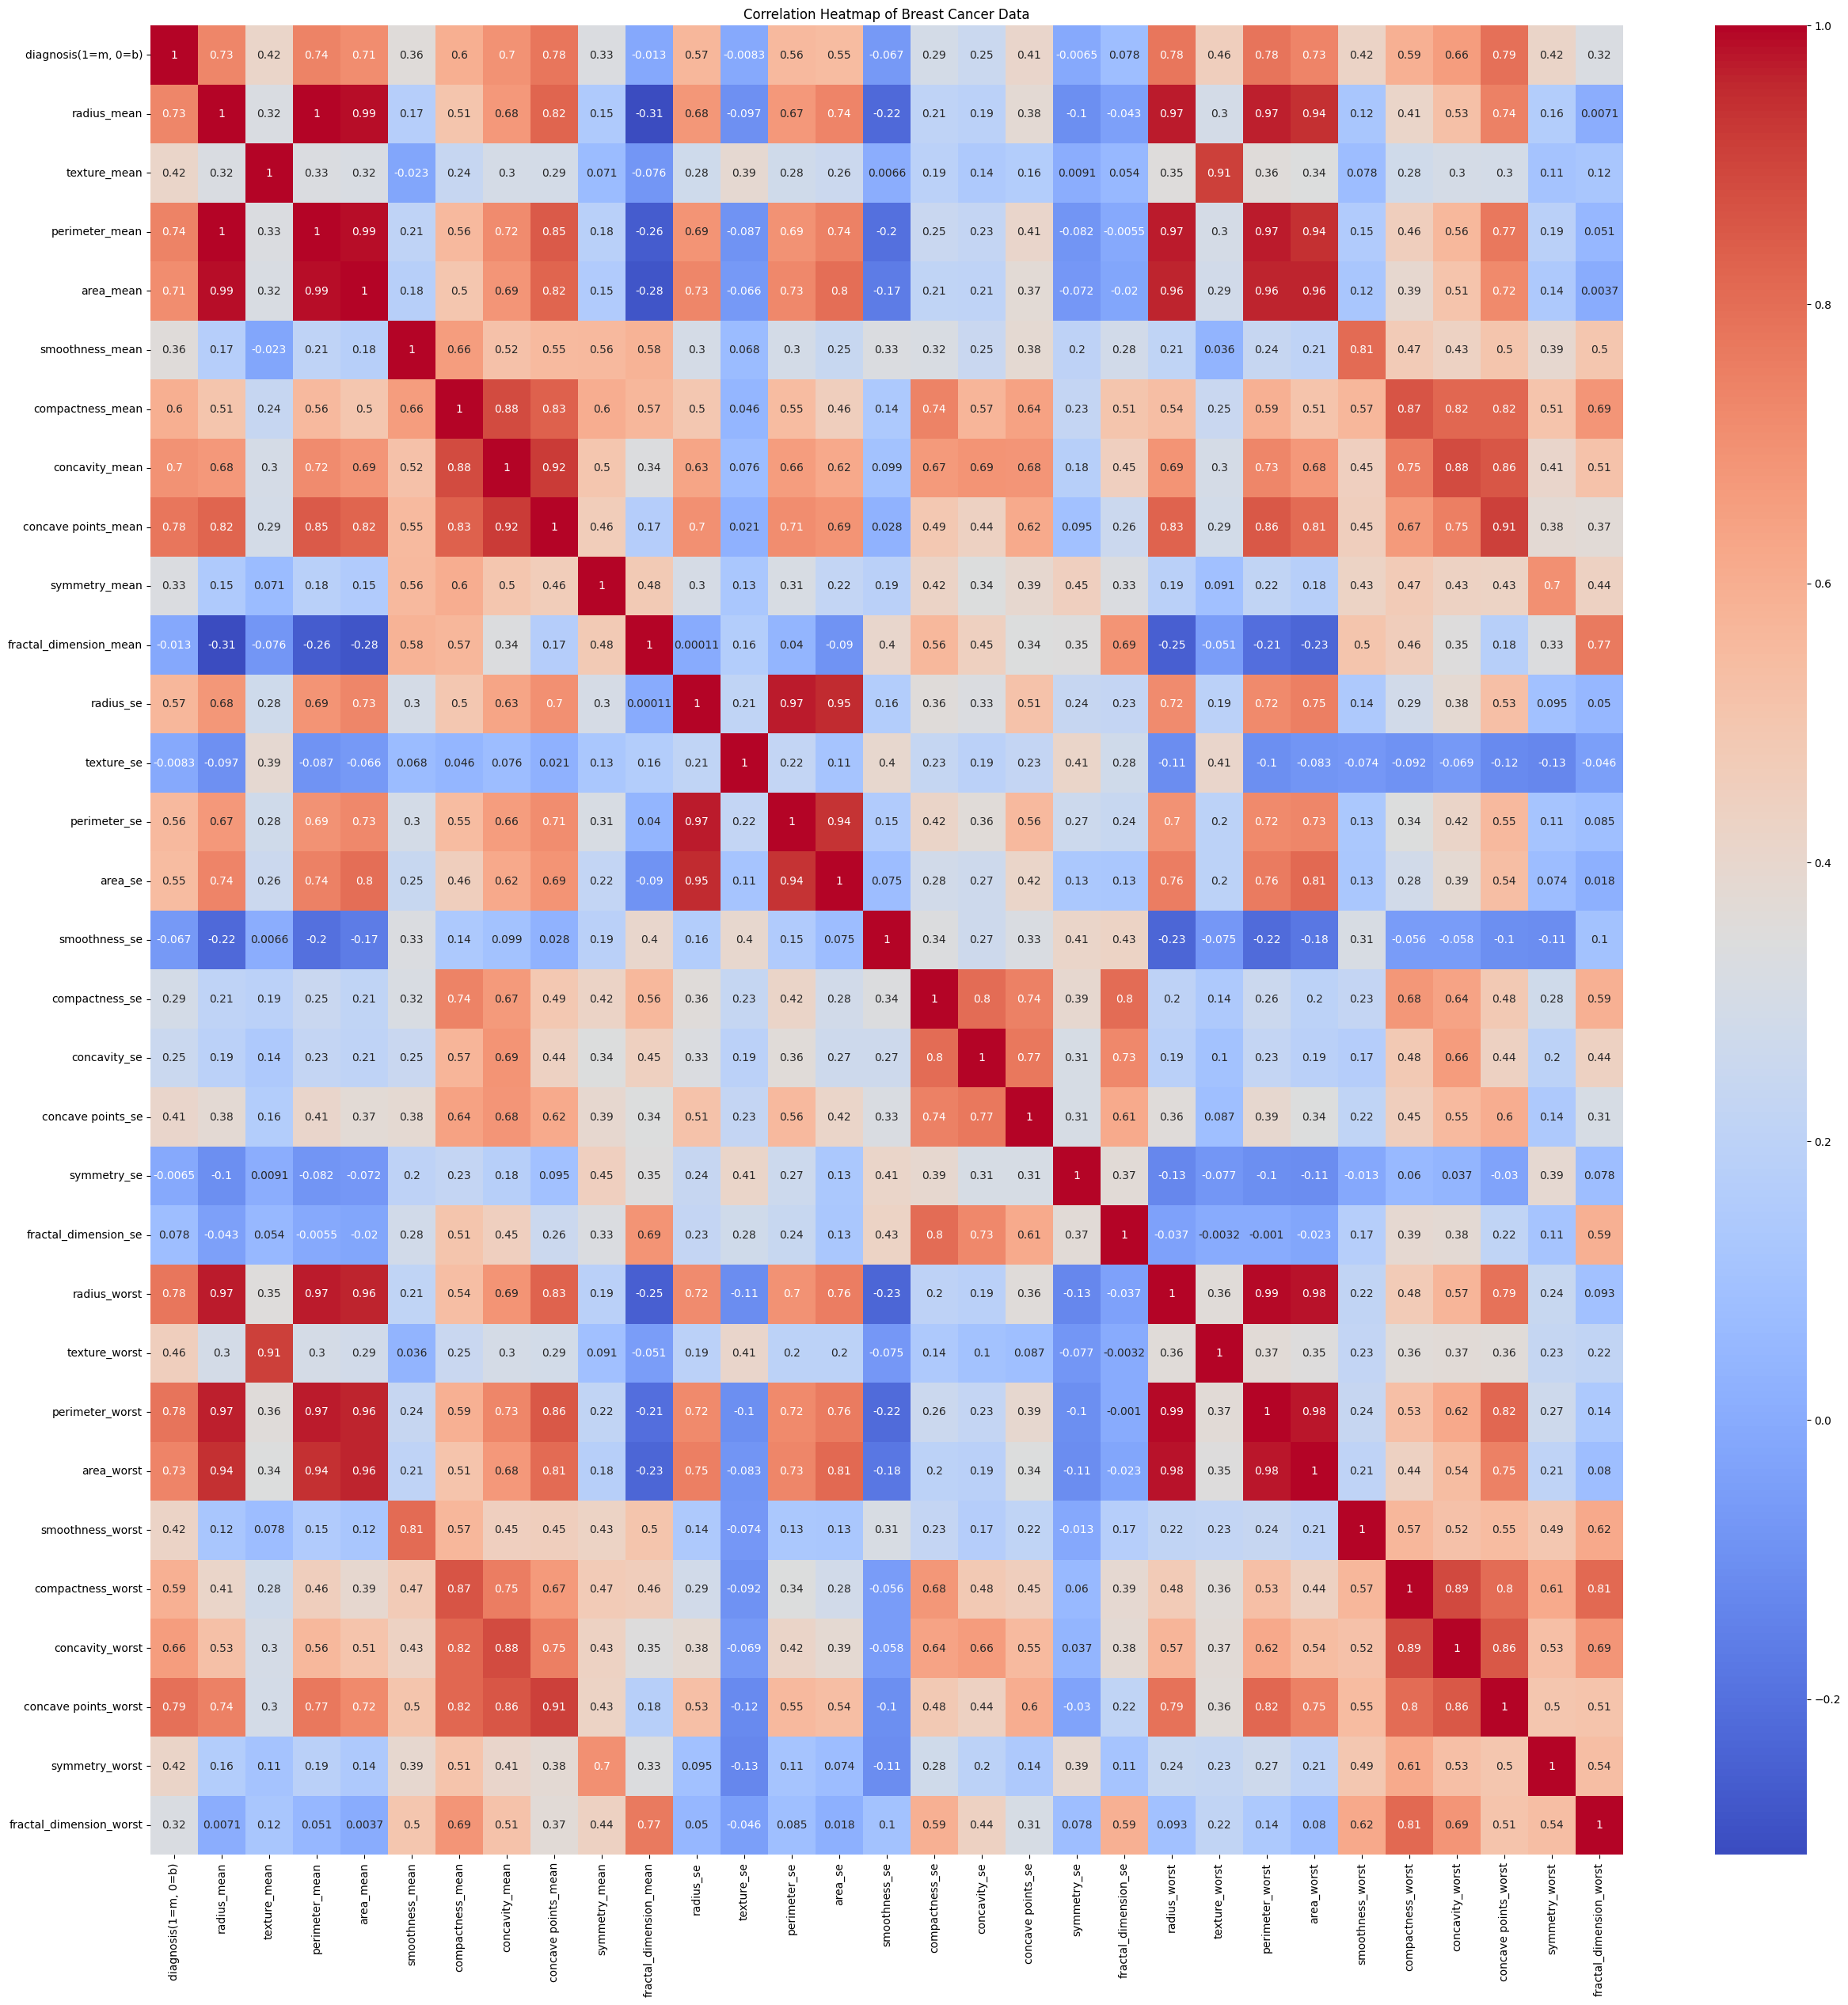

In [ ]:
# checking the correlation between features and target
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Data')
plt.show()

In [ ]:
# lets get the target and the features differently
X = df.drop(columns = ['diagnosis(1=m, 0=b)'])

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df['diagnosis(1=m, 0=b)']
y.head()

,"diagnosis(1=m, 0=b)"
0,1
1,1
2,1
3,1
4,1


In [ ]:
# spliting the data into test and train set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks


In [ ]:
model = keras.Sequential([
    layers.Dense(256, input_shape = [30], activation = 'sigmoid'),
    layers.Dense(256, activation = 'sigmoid'),
    layers.Dense(1, activation = 'sigmoid')
])


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose = 1
)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - accuracy: 0.6287 - loss: 0.7036 - val_accuracy: 0.7807 - val_loss: 0.6261
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7662 - loss: 0.6356 - val_accuracy: 0.9298 - val_loss: 0.6062
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8857 - loss: 0.6036 - val_accuracy: 0.6228 - val_loss: 0.5518
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6352 - loss: 0.5581 - val_accuracy: 0.6228 - val_loss: 0.5397
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6313 - loss: 0.5467 - val_accuracy: 0.6228 - val_loss: 0.5013
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6578 - loss: 0.5162 - val_accuracy: 0.9211 - val_loss: 0.4625
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8748 - loss: 0.4827 - val_accuracy: 0.9298 - val_loss: 0.4408
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8834 - loss: 0.4616 - val_accuracy: 0.9211 - val_loss

In [ ]:
# verbose can also be set to '0' so the information on the training above doest show


'\nearly_stopping = callbacks.EarlyStopping(\n    min_delta=0.001, # minimium amount of change to count as an improvement\n    patience=20, # how many epochs to wait before stopping\n    restore_best_weights=True\n'

In [ ]:
model.evaluate(X_valid, y_valid)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9595 - loss: 0.0863 


[0.09297534823417664, 0.9561403393745422]

In [ ]:
#  model has an accuracy of 96 %